## Prepping the data

In [2]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# reading the data in CSV format
superstore = pd.read_csv("Superstore(edited).csv",encoding='latin1')

## Data Exploration

In [4]:
# Preview first 5 rows of the dataset
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# Preview the last 5 rows of the dataset
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
# Shape of the dataset
superstore.shape

(9994, 13)

In [7]:
# Summarized information of the dataset
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning

In [8]:
# Finding out the number of null values for all columns
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Finding out if there are any duplicate data in the dataset
superstore[superstore.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [10]:
# Dropping the duplicate rows
superstore.drop_duplicates(inplace = True)

In [11]:
# Finding the number of rows and columns
superstore.shape

(9977, 13)

Now, we have to create a calculated field for Profit margin. Formula : (Profit/Sales) * 100

In [12]:
superstore['Profit Margin %'] = (superstore.Profit/superstore.Sales) * 100

In [13]:
superstore.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


## Descriptive Statistics

In [14]:
# Descriptive statistics summary of the dataset
superstore.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


Some columns are showing the value 'Nan', Categorical values are not meant to have calculations performed on them, so we can ignore those.

We are meant to focus on the frequency and Unique count of categorical features such as

*   There are 4 ship modes and 3 customer segments. We can see that **nearly half of the orders are from Consumer segment using Standard class shipment.**
*   The store has 3 categories and 17 sub categories. In this, **60% of orders are for Office supplies and atleast 15% purchases are for Binders.**



Whereas when we come over to Numerical columns, it is interesting to note that

*  **75% of the orders make up to around 36% profit margin**.
*   **Loss making orders is going upto 275% losses, We have to place emphasis on these loss making sales to cut them off**.



We will perform analysis below to test those observations.


## Exploratory Data Analysis

###**1. Which category is Best selling and most profitable?**

For best selling, we will be looking at Sales, and for most profitable that is referring to Profit. We will group Sales, Profit, Quantity by category and run the df.group()sum and pd.DataFrame() functions.

In [15]:
#Grouping the Sales, Profit and Quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


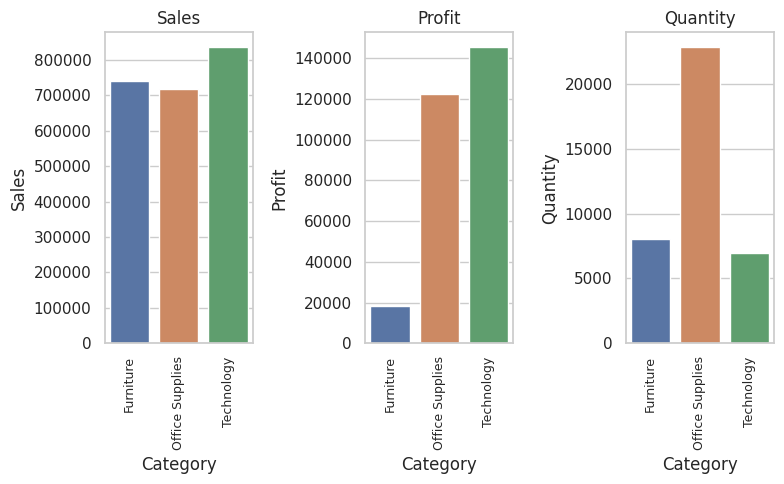

In [16]:
# Set for grouped plots - figure witha 2x2 grid of axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for X-axis labels
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Setting spaces between subplots
figure.tight_layout()

From the above figure, we can observe that

*   All 3 categories i.e Furniture, Office Supplies and Technology make similiar amount of sales.

*   Technology is best selling and also is the most profitable category. Although minimum quantity is sold as these products are usually one off purchases.

*   Even though Furniture makes almost similiar sales as technology, it is the least profitable and the quantity sold is less.

*   Office supplies sells the most in terms of quantity, as it is relatively cheap product compared to other two.





###**2. What are the Best selling and most Profitable Sub-category?**

In [18]:
# Group by subcategory
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [20]:
# Sorting it by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [21]:
# Sorting the profit in descending order
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


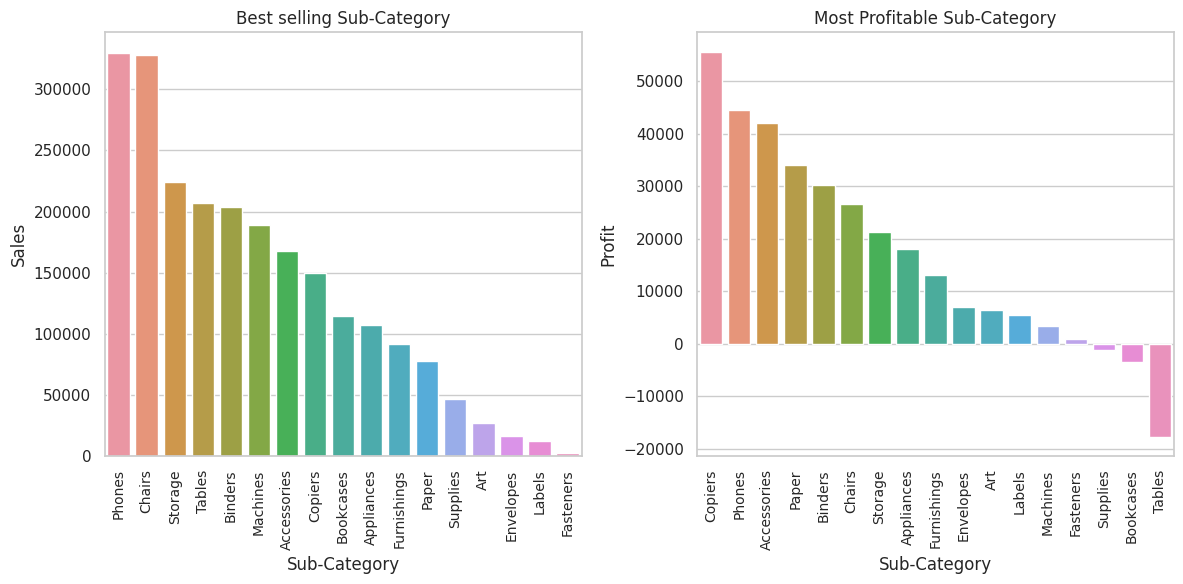

In [23]:
# Plotting the Bar graphs

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with 1x2 grid of axis
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Bar graph for Best selling Sub-category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title = "Best selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(), rotation = "vertical", size = 10)

# Plotting bar graph for Most profitable Sub-category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

Analysing the bar graphs

- Phones and Chairs are the top 2 best selling Sub-category.
- We can see that, Copiers bring in the most profits followed by Phones, Accessories, Paper and Binders. **Marketing strategy has to focus more on marketing these products**.
- On the other hand, Sub-categories like Machines, Fasteners, Supplies, Bookcases and Tables are making close to zero margin to losses. **SuperStore can can consider dropping these from the product catalog to increase the sale price and profit margin or bargain/negotiate for a lower price from the supplier.**


###**3) Which is the Top Selling Sub-category?**

In [25]:
subcat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity', ascending = False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


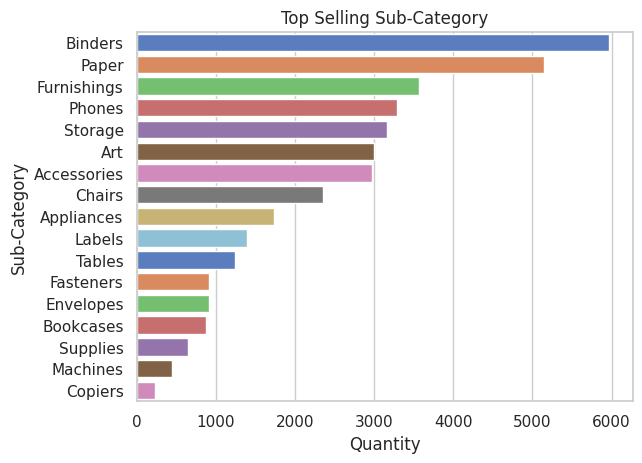

In [26]:
# Plotting bar graph for Top selling sub category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

Here, we can deduce from the graph
- Super store should always ensure that the inventory for the top selling sub category like Binders, Paper, Furnishings and Phones are always well stocked.
- Copiers sell the least i.e 234 only, despite being the most profitable Sub category. Mostly because it is relatively expensive and used for few years so it is quite understandable that it sells the least among them.


###**4) Which customer segment is Most Profitable?**


In [27]:
segment_analysis = pd.DataFrame(superstore.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


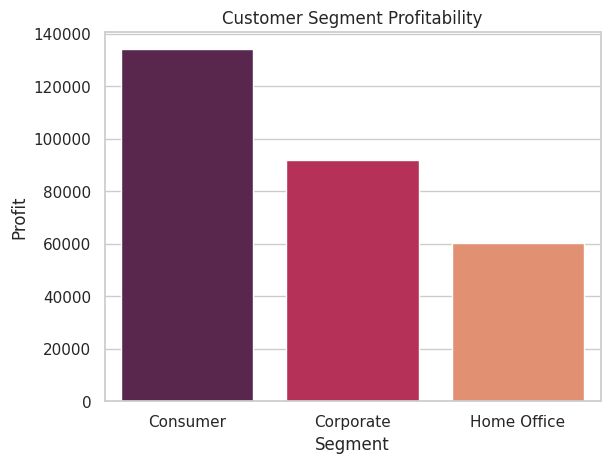

In [29]:
# Plotting bar graphs
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

Consumer segment is most profitable, followed by Corporate then Home Office. Marketing strategy should target and focus more on retaining the consumer segment and Corporate segment customers.

###**5) Which is the preferred Ship Mode?**


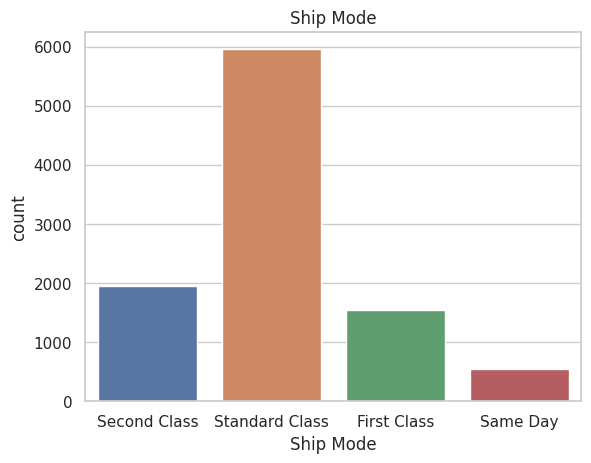

In [38]:
# Plotting the bar graph
sns.set_theme(style="whitegrid")
sns.countplot(data = superstore, x ='Ship Mode')
plt.title("Ship Mode")
plt.show()


From the graph, we can see that Standard Class Ship mode is the most preferred Ship mode. Whereas other modes like same day, first class aren't that popular, maybe they are too costly.

###**6) Which region is the most profitable**?


In [39]:
region_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


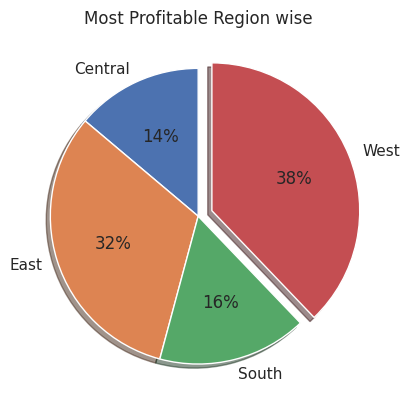

In [40]:
# Plotting pie chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable Region wise")
plt.show()

West region (38%) followed by East region (32%) are considered to be the most profitable.

###**7) Which City has the highest number of Sales?**

In [41]:
city_sales = pd.DataFrame(superstore.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales', ascending = False))
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [42]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


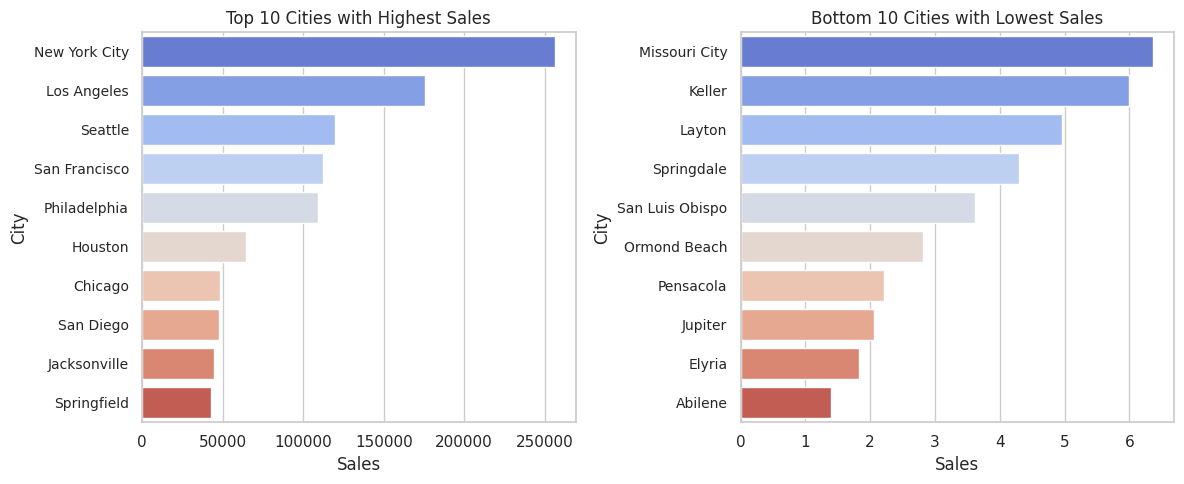

In [47]:
# Set for grouped plots - figure witha 1x2 grid of axis
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")
# Plotting bar graph for top 10 cities with Highest Sales

top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette ="coolwarm", ax = axis[0])
top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plotting bar graph for bottom 10 cities with Lowest Sales

bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette ="coolwarm", ax = axis[1])
bottom10c.set(title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size = 10)

# setting space betweeen sub plots
figure.tight_layout()

plt.show()

Huge disparity can be seen in cities with highest sales and lowest sales. Marketing strategy should be targetting top 10 cities.

###**Strategic Recommendations**

**Revisting the business questions and below are few high level business recommendations.**

#Questions


1.   Which Category is Best Selling and Most Profitable?
2.   What are the Best Selling and Most Profitable Sub-Category?
3.   Which is the Top Selling Sub-Category?
4.   Which Customer Segment is Most Profitable?
5.   Which is the Preferred Ship Mode?
6.   Which Region is the Most Profitable?
7.   Which city has the Highest number of Sales?


#Recommendations



*   **Selling Bookcases, Tables are resulting in huge losses, Super Store can consider bundling them together with High Selling or Profitable sub-category such as Chairs, Office Supplies, Copiers, etc to offset the losses. Meanwhile, extra focus could be put on Sub-categories like Phones, Chairs as they are highest selling and also most profitable.**

*   **For Home Offices customers, they seem to be less likely to spend time selecting individual products, we could create Home Office package which contains products used in Offices such as Table, Chair, Phone, Copiers, Accessories, Bookcases.**

*   **Another approach would be to consider to drop Loss making products like Bookcases, Supplies from the product catalogue or bargain/negotiate these products for cheaper prices with suppliers.**

*   **Consumer segment and Corporate segment make up more than 70 % of customerbase of Super Store. Main focus should be on targeting them especially those from West and East region in Top 10 cities with highest sales. This could be done either by introducing them to Special promotions, exclusive discounts for loyal consumers, bundles for mass consumer and Home Offices and sending them promotional emails regarding the same.**



